In [1]:
from utils.loadData import *
from utils.rmse import *
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
learn_X, learn_y, test_X, test_y = set_up()
learn_X.drop(columns=['process_end_time', 'final_mes_time'], inplace=True)
test_X.drop(columns=['process_end_time', 'final_mes_time'], inplace=True)

In [3]:
learn_y.describe().T

,count,mean,std,min,25%,50%,75%,max
OV,1155.0,156.033689,54.679704,52.56268,111.06275,148.1947,195.1927,418.4056


array([[<Axes: title={'center': 'OV'}>]], dtype=object)

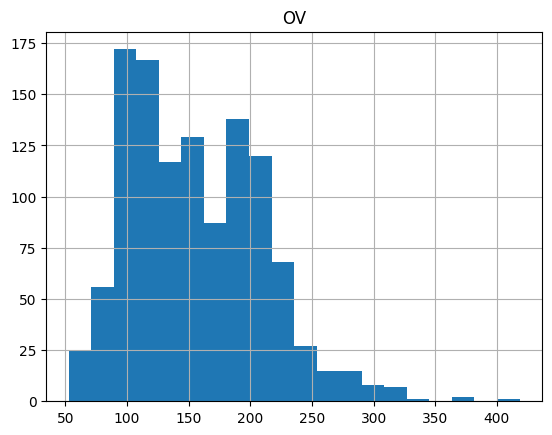

In [4]:
learn_y.hist(
    bins=20,
)

In [146]:
# Xのデータを、X31, X34だけにする
learn_X = learn_X[['X33', 'X30', 'X25', 'X28', 'X64', 'X8', 'X39', 'X14', 'X29', 'X17', 'X55', 'X71', 'X35', 'X48', 'X63', 'X9', 'X44']]
test_X = test_X[['X33', 'X30', 'X25', 'X28', 'X64', 'X8', 'X39', 'X14', 'X29', 'X17', 'X55', 'X71', 'X35', 'X48', 'X63', 'X9', 'X44']]

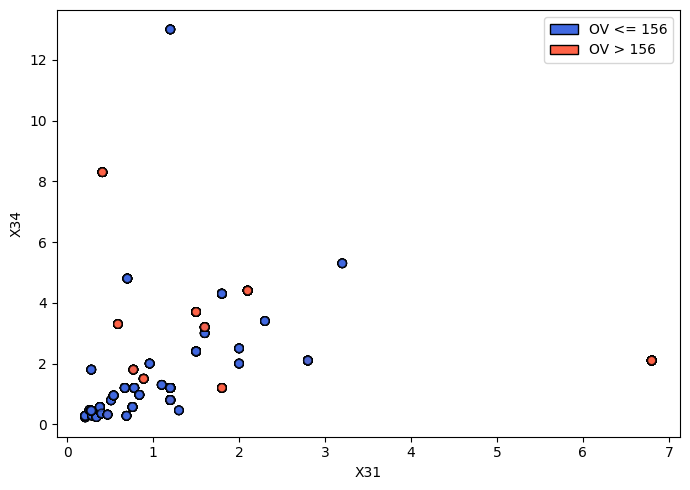

In [147]:
import matplotlib.pyplot as plt

# learn_X, test_X, learn_y_array, test_y_arrayがすでにある前提
# OVが156より上か下かで色分け
# 学習・テストデータを連結して一緒にプロットする
X_concat = np.concatenate([learn_X.values, test_X.values], axis=0)
y_concat = np.concatenate([learn_y_array, test_y_array], axis=0)

colors = np.where(y_concat > 156, 'tomato', 'royalblue')

plt.figure(figsize=(7,5))
plt.scatter(X_concat[:,0], X_concat[:,1], c=colors, edgecolor='k', alpha=0.7)
plt.xlabel("X31")
plt.ylabel("X34")
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='royalblue', edgecolor='k', label='OV <= 156'),
    Patch(facecolor='tomato', edgecolor='k', label='OV > 156')
]
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()


model=xgb X31<=12, X34<=13 RMSE: 108.6200
model=xgb X31<=12, X34<=13 RMSE: 99.4259
model=xgb X31<=12, X34<=13 RMSE: 93.4139
model=xgb X31<=12, X34<=13 RMSE: 94.0379
model=xgb X31<=12, X34<=13 RMSE: 94.0379
model=xgb X31<=12, X34<=13 RMSE: 91.3991
model=xgb X31<=12, X34<=13 RMSE: 91.3991
model=xgb X31<=12, X34<=13 RMSE: 91.3991
model=xgb X31<=12, X34<=13 RMSE: 72.0051
model=xgb X31<=12, X34<=13 RMSE: 92.9891
model=xgb X31<=12, X34<=13 RMSE: 112.2410
model=xgb X31<=12, X34<=13 RMSE: 86.4229
model=xgb X31<=12, X34<=13 RMSE: 86.4229
model=xgb X31<=12, X34<=13 RMSE: 86.0218
model=xgb X31<=12, X34<=13 RMSE: 86.0218
model=xgb X31<=12, X34<=13 RMSE: 86.0218
model=xgb X31<=12, X34<=13 RMSE: 72.0051
model=xgb X31<=12, X34<=13 RMSE: 92.9891
model=xgb X31<=12, X34<=13 RMSE: 112.2410
model=xgb X31<=12, X34<=13 RMSE: 86.4229
model=xgb X31<=12, X34<=13 RMSE: 86.4229
model=xgb X31<=12, X34<=13 RMSE: 86.0218
model=xgb X31<=12, X34<=13 RMSE: 86.0218
model=xgb X31<=12, X34<=13 RMSE: 86.0218
model=xgb X31

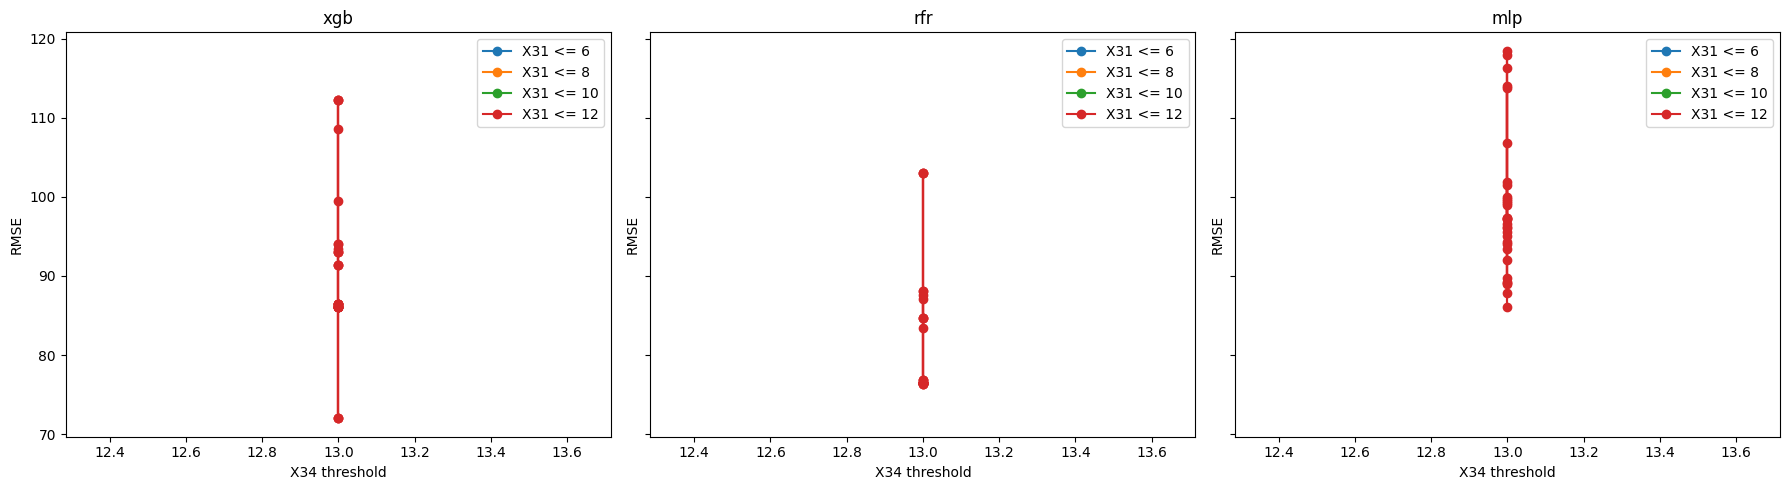

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import torch
import torch.nn as nn
import torch.optim as optim

# 使いたい変数一覧
selected_vars = ['X33', 'X30', 'X25', 'X28', 'X64', 'X8', 'X39', 'X14',
                 'X29', 'X17', 'X55', 'X71', 'X35', 'X48', 'X63', 'X9', 'X44']

# 閾値のリスト（例としてX33, X30に変える ＝ 1番目・2番目のカラム）
x33_thresholds = [6, 8, 10, 12]
x30_thresholds = [3, 5, 7, 9, 11, 13, 15, 17]

# モデル定義関数
def get_model(model_type, input_dim):
    if model_type == "xgb":
        return xgb.XGBRegressor(random_state=0, n_jobs=-1)
    elif model_type == "rfr":
        return RandomForestRegressor(random_state=0)
    elif model_type == "mlp":
        # より厚い（多層）ニューラルネット
        class DeeperMLP(nn.Module):
            def __init__(self):
                super().__init__()
                self.linear1 = nn.Linear(input_dim, 64)
                self.relu1 = nn.ReLU()
                self.linear2 = nn.Linear(64, 32)
                self.relu2 = nn.ReLU()
                self.linear3 = nn.Linear(32, 16)
                self.relu3 = nn.ReLU()
                self.linear4 = nn.Linear(16, 1)
            def forward(self, x):
                x = self.linear1(x)
                x = self.relu1(x)
                x = self.linear2(x)
                x = self.relu2(x)
                x = self.linear3(x)
                x = self.relu3(x)
                x = self.linear4(x)
                return x
        return DeeperMLP()
    else:
        raise ValueError("model_type must be xgb, rfr, mlp")

# pytorch用学習関数
def train_mlp(model, X_train, y_train, epochs=80):
    device = torch.device('cpu')
    model.to(device)
    X_tensor = torch.FloatTensor(X_train)
    y_tensor = torch.FloatTensor(y_train).unsqueeze(1)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X_tensor)
        loss = criterion(output, y_tensor)
        loss.backward()
        optimizer.step()

def predict_mlp(model, X):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.FloatTensor(X)
        y_pred = model(X_tensor).numpy().flatten()
    return y_pred

results = {}

model_types = ["xgb", "rfr", "mlp"]

# サブセットデータ
learn_X_sub = learn_X[selected_vars]
test_X_sub = test_X[selected_vars]
input_dim = learn_X_sub.shape[1]

for model_type in model_types:
    rmses = []
    for x33_th in x33_thresholds:
        for x30_th in x30_thresholds:
            # クラス定義: X33, X30 (それぞれ選択変数のindex 0, 1 にいるものとする)
            learn_cond_class = (learn_X_sub["X33"] <= x33_th) & (learn_X_sub["X30"] <= x30_th)
            test_cond_class = (test_X_sub["X33"] <= x33_th) & (test_X_sub["X30"] <= x30_th)

            y_pred = np.zeros_like(test_y_array, dtype=float)

            for class_value in [True, False]:
                idx_learn = np.where(learn_cond_class == class_value)[0]
                idx_test = np.where(test_cond_class == class_value)[0]
                if len(idx_learn) == 0 or len(idx_test) == 0:
                    continue
                if model_type in ["xgb", "rfr"]:
                    model = get_model(model_type, input_dim)
                    model.fit(learn_X_sub.iloc[idx_learn], learn_y_array[idx_learn])
                    y_pred[idx_test] = model.predict(test_X_sub.iloc[idx_test])
                elif model_type == "mlp":
                    model = get_model(model_type, input_dim)
                    X_tr = learn_X_sub.iloc[idx_learn].values
                    y_tr = learn_y_array[idx_learn]
                    train_mlp(model, X_tr, y_tr)
                    X_te = test_X_sub.iloc[idx_test].values
                    y_pred[idx_test] = predict_mlp(model, X_te)

            rmse = np.sqrt(mean_squared_error(test_y_array, y_pred))
            rmses.append((x31_th, x34_th, rmse))
            print(f"model={model_type} X31<={x31_th}, X34<={x34_th} RMSE: {rmse:.4f}")
    results[model_type] = rmses

# プロット

fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)
for i, model_type in enumerate(model_types):
    ax = axes[i]
    rmses = results[model_type]
    for x31_th in x31_thresholds:
        x = [x34_th for xx31, x34_th, _ in rmses if xx31 == x31_th]
        y = [rmse for xx31, x34_th, rmse in rmses if xx31 == x31_th]
        ax.plot(x, y, marker="o", label=f"X31 <= {x31_th}")
    ax.set_title(model_type)
    ax.set_xlabel("X34 threshold")
    ax.set_ylabel("RMSE")
    ax.legend()
plt.tight_layout()
plt.show()


In [134]:
results["mlp"]

[(6, 3, np.float64(95.03562909835851)),
 (6, 5, np.float64(87.04090558774699)),
 (6, 7, np.float64(81.43928212965676)),
 (6, 9, np.float64(85.39033330714427)),
 (6, 11, np.float64(91.25983079498464)),
 (6, 13, np.float64(81.42121182267647)),
 (6, 15, np.float64(96.15610441920643)),
 (6, 17, np.float64(89.97808133304822)),
 (8, 3, np.float64(100.2774953240373)),
 (8, 5, np.float64(88.67517911248734)),
 (8, 7, np.float64(82.63843973882075)),
 (8, 9, np.float64(89.31197284807858)),
 (8, 11, np.float64(84.87916426583375)),
 (8, 13, np.float64(81.50362825435467)),
 (8, 15, np.float64(91.41032581630475)),
 (8, 17, np.float64(82.70588861213268)),
 (10, 3, np.float64(96.84078861461177)),
 (10, 5, np.float64(84.46284080369678)),
 (10, 7, np.float64(82.95775515896302)),
 (10, 9, np.float64(93.33273123270631)),
 (10, 11, np.float64(84.11682563627171)),
 (10, 13, np.float64(89.37789239667771)),
 (10, 15, np.float64(81.43816447770632)),
 (10, 17, np.float64(83.73567079976975)),
 (12, 3, np.float64(

層数: 1, ユニット数: 32 --- RMSE: 87.5137
層数: 1, ユニット数: 64 --- RMSE: 111.4972
層数: 1, ユニット数: 128 --- RMSE: 101.4065
層数: 1, ユニット数: 256 --- RMSE: 94.8869
層数: 2, ユニット数: 32 --- RMSE: 101.8183
層数: 2, ユニット数: 64 --- RMSE: 95.3041
層数: 2, ユニット数: 128 --- RMSE: 95.3714
層数: 2, ユニット数: 256 --- RMSE: 87.0301
層数: 3, ユニット数: 32 --- RMSE: 92.7198
層数: 3, ユニット数: 64 --- RMSE: 92.9287
層数: 3, ユニット数: 128 --- RMSE: 93.3218
層数: 3, ユニット数: 256 --- RMSE: 81.8692
層数: 4, ユニット数: 32 --- RMSE: 97.6721
層数: 4, ユニット数: 64 --- RMSE: 90.8616
層数: 4, ユニット数: 128 --- RMSE: 85.1599
層数: 4, ユニット数: 256 --- RMSE: 77.5362
層数: 5, ユニット数: 32 --- RMSE: 90.5210
層数: 5, ユニット数: 64 --- RMSE: 94.2500
層数: 5, ユニット数: 128 --- RMSE: 78.5589
層数: 5, ユニット数: 256 --- RMSE: 73.3710


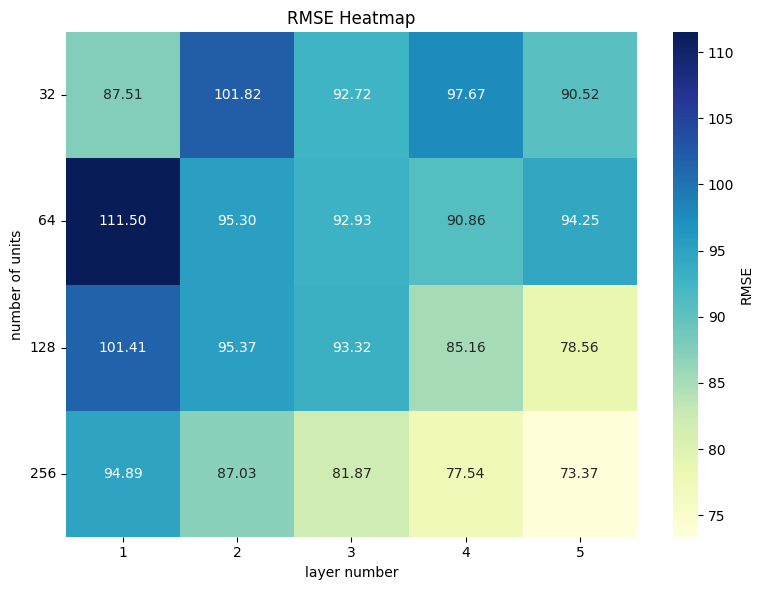

In [15]:
# いろんな構造でMLPを比較し，RMSEをヒートマップで可視化する

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 使いたい変数一覧
selected_vars = ['X33', 'X30', 'X25', 'X28', 'X64', 'X8', 'X39', 'X14',
                 'X29', 'X17', 'X55', 'X71', 'X35', 'X48', 'X63', 'X9', 'X44']

# 使う変数を抽出
X = learn_X[selected_vars]
y = learn_y

# pandas → torch
X_train = torch.tensor(X.values, dtype=torch.float32)
y_train = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(test_X[selected_vars].values, dtype=torch.float32)
y_test = torch.tensor(test_y.values, dtype=torch.float32).view(-1, 1)

# ネットワークの探索（層数: 1~4, 各層のunit数: 32, 64, 128, 256）
layer_units = [32, 64, 128, 256]
layer_counts = [i for i in range(1, 6)]

mlp_configs = []
for n_layers in layer_counts:
    for hidden_unit in layer_units:
        hidden = [hidden_unit] * n_layers
        mlp_configs.append((tuple(hidden), n_layers, hidden_unit))

class FlexibleMLP(nn.Module):
    def __init__(self, input_dim, hidden_sizes):
        super().__init__()
        layers = []
        prev_dim = input_dim
        for h in hidden_sizes:
            layers.append(nn.Linear(prev_dim, h))
            layers.append(nn.ReLU())
            prev_dim = h
        layers.append(nn.Linear(prev_dim, 1))
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x)

def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=200, lr=1e-3, verbose=False):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        if verbose and epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss {loss.item():.4f}")
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test).cpu().numpy().flatten()
        rmse = np.sqrt(mean_squared_error(y_test.cpu().numpy().flatten(), y_pred))
    return rmse

# 各構造でRMSEを記録
results = []
input_dim = X_train.shape[1]

for hidden, n_layers, hidden_unit in mlp_configs:
    model = FlexibleMLP(input_dim, hidden)
    rmse = train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=200, lr=1e-3, verbose=False)
    print(f"層数: {n_layers}, ユニット数: {hidden_unit} --- RMSE: {rmse:.4f}")
    results.append({
        "層数": n_layers,
        "ユニット数": hidden_unit,
        "RMSE": rmse
    })

# 結果をヒートマップで可視化
df_heat = pd.DataFrame(results)
heatmap_data = df_heat.pivot(index="ユニット数", columns="層数", values="RMSE").sort_index()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'RMSE'})
plt.ylabel("number of units")
plt.xlabel("layer number")
plt.title("RMSE Heatmap")
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()